<a href="https://colab.research.google.com/github/bharathi6127/codsoft_4_spam/blob/main/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SPAM SMS DETECTION**

Build an AI model that can classify SMS messages as spam or
legitimate. Use techniques like TF-IDF or word embeddings with
classifiers like Naive Bayes, Logistic Regression, or Support Vector
Machines to identify spam messages.

# Step-1 : Import Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# Step-2 : Download stopwords

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Step-3 : Load the dataset

In [3]:
# Load the dataset
data = pd.read_csv("/content/spam dataset.csv", encoding='latin-1')


In [4]:
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [5]:
print(data.tail())

        v1                                                 v2 Unnamed: 2  \
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  


In [6]:
print(data.shape)

(5572, 5)


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


# Step-4 : Preprocess the dataset

In [8]:
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Encode the labels
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Text processing
stop_words = stopwords.words('english')
tfidf = TfidfVectorizer(stop_words=stop_words)

# Features and labels
X = data['message']
y = data['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-8-f68c5c0b5c55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'ham': 0, 'spam': 1})


# Step-5 : Define classifiers

In [9]:
# Define classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(kernel='linear')
}


# Step-6 : Train and evaluate each classifier


Training Naive Bayes...
Accuracy: 0.9704
Classification Report:
                precision    recall  f1-score   support

Legitimate SMS       0.97      1.00      0.98       965
      Spam SMS       1.00      0.78      0.88       150

      accuracy                           0.97      1115
     macro avg       0.98      0.89      0.93      1115
  weighted avg       0.97      0.97      0.97      1115



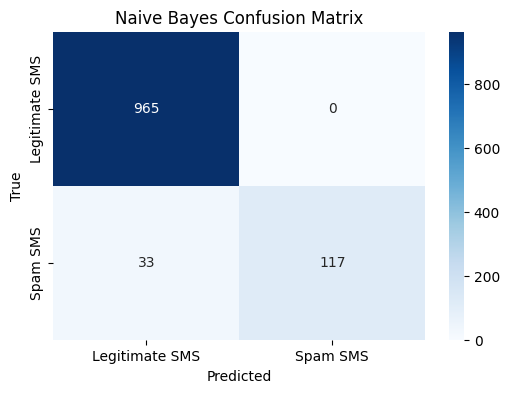


Training Logistic Regression...
Accuracy: 0.9561
Classification Report:
                precision    recall  f1-score   support

Legitimate SMS       0.96      0.99      0.98       965
      Spam SMS       0.95      0.71      0.81       150

      accuracy                           0.96      1115
     macro avg       0.96      0.85      0.89      1115
  weighted avg       0.96      0.96      0.95      1115



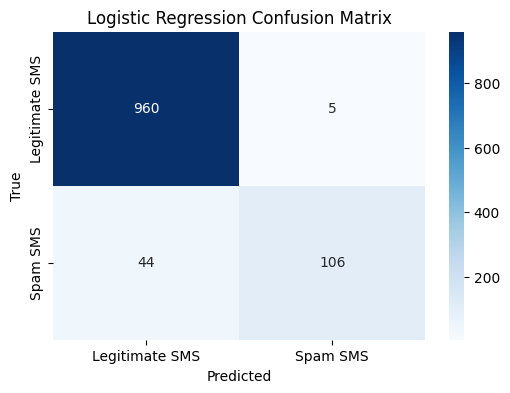


Training Support Vector Machine...
Accuracy: 0.9803
Classification Report:
                precision    recall  f1-score   support

Legitimate SMS       0.98      1.00      0.99       965
      Spam SMS       0.98      0.87      0.92       150

      accuracy                           0.98      1115
     macro avg       0.98      0.94      0.96      1115
  weighted avg       0.98      0.98      0.98      1115



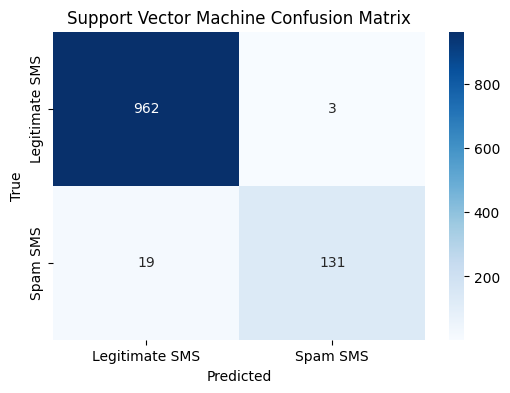

In [10]:
for name, clf in classifiers.items():
    print(f'\nTraining {name}...')

    # Create a pipeline
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words=stop_words)),
        ('clf', clf)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Legitimate SMS', 'Spam SMS'])
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(report)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate SMS', 'Spam SMS'], yticklabels=['Legitimate SMS', 'Spam SMS'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Example usage of the trained model (Naive Bayes)

In [11]:
# Example usage of the trained model (Naive Bayes)
example_texts = ["Congratulations! You've won a free ticket to Bahamas. Call now!",
                 "Hey, are we still meeting for lunch tomorrow?"]

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', MultinomialNB())
])
pipeline.fit(X_train, y_train)
example_preds = pipeline.predict(example_texts)

print("\nExample Predictions:")
for text, pred in zip(example_texts, example_preds):
    print(f'Text: {text}\nPrediction: {"Spam" if pred else "Ham"}\n')


Example Predictions:
Text: Congratulations! You've won a free ticket to Bahamas. Call now!
Prediction: Ham

Text: Hey, are we still meeting for lunch tomorrow?
Prediction: Ham

